<a href="https://colab.research.google.com/github/jamesmattluyon/CpE-AIML/blob/main/58034_LabNo_03_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `Dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class LinearRegression_Simple():
  def covariance(self, vecA, vecB):
    return np.cov(vecA,vecB)[0,1]
    
  def pearsons_r(self, vecA, vecB):
    return np.corrcoef(vecA, vecB)[0,1]
  
  def train(self, X, y):
    x_train = X.T
    std_X, std_y = np.std(x_train), np.std(y)
    pearson_r = np.corrcoef(x_train,y)[0,1]
    self.w1 = pearson_r*(std_y/std_X)
    self.w0 = y.mean()-self.w1*x_train.mean()
    self.model_ = np.round((self.w1,self.w0),2).reshape(-1,1)
    return self.model_

  def predict(self, x):
    return np.round((self.w0+(self.w1*x)),2).reshape(-1,1)    
  
  def evaluate(self):
    y_hat = self.predict(X).reshape(1,len(X))
    SST = np.round((np.sum(np.square(y-y.mean()))),2)
    SSR = np.round((np.sum(np.square(y_hat-y.mean()))),2)
    SSE = np.round((np.sum(np.square(y_hat-y))),2)
    MSE = np.round(np.mean(np.square(y_hat-y)),2)
    RMSE = np.round(np.sqrt(MSE),2)
    R2 = np.round(1 - (SSE/SST),2)
    adj_R2 = np.round((1-((1-R2)*(len(y)-1)/(len(y)-len(X)-1))),2) 
    dict_1 = {
    'SST': SST,
    'SSR': SSR,
    'SSE': SSE,
    'MSE': MSE,
    'RMSE': RMSE,
    'R^2': R2,
    'Adj. R^2': adj_R2
    }
    return dict_1
  
  def visualize(self):   
    linearRegressor = (self.w0+(self.w1*X))
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(X, y, label='Points')
    plt.plot(X, linearRegressor, label='Linear Regressor', color='red')
    plt.legend()
    plt.savefig('LinearRegressor.jpg', bbox_inches='tight', dpi=400)
    return plt.show()

  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [ ]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

-456.6633012116484

Expected output value:
$$cov_{x,y} = -456.66$$

In [ ]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

-0.9050803915258335

Expected output value:
$$r = -0.90$$

In [ ]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([[-0.54],
       [-9.38]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [ ]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

array([[-63.64],
       [-64.18],
       [-64.72],
       [-65.26],
       [-65.81]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adj. R^2': 18.82,
 'MSE': 54.15,
 'RMSE': 7.36,
 'R^2': 0.82,
 'SSE': 5415.15,
 'SSR': 24529.36,
 'SST': 29944.22}

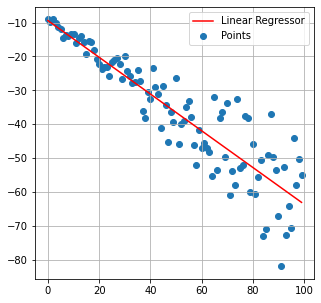

In [ ]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()